# 电影数据集分析
在这个项目中，你将尝试使用所学的知识，使用 `NumPy`、`Pandas`、`matplotlib`、`seaborn` 库中的函数，来对电影数据集进行探索。

下载数据集：
[TMDb电影数据](https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/tmdb-movies.csv)


数据集各列名称的含义：
<table>
<thead><tr><th>列名称</th><th>id</th><th>imdb_id</th><th>popularity</th><th>budget</th><th>revenue</th><th>original_title</th><th>cast</th><th>homepage</th><th>director</th><th>tagline</th><th>keywords</th><th>overview</th><th>runtime</th><th>genres</th><th>production_companies</th><th>release_date</th><th>vote_count</th><th>vote_average</th><th>release_year</th><th>budget_adj</th><th>revenue_adj</th></tr></thead><tbody>
 <tr><td>含义</td><td>编号</td><td>IMDB 编号</td><td>知名度</td><td>预算</td><td>票房</td><td>名称</td><td>主演</td><td>网站</td><td>导演</td><td>宣传词</td><td>关键词</td><td>简介</td><td>时常</td><td>类别</td><td>发行公司</td><td>发行日期</td><td>投票总数</td><td>投票均值</td><td>发行年份</td><td>预算（调整后）</td><td>票房（调整后）</td></tr>
</tbody></table>


## 1. 数据导入和预处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_excel('tmdb-movies.xls')

In [28]:
dataset.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15 00:00:00,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15 00:00:00,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
dataset.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
dataset.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
pd.isnull(dataset).any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [7]:
pd.isnull(dataset).sum().sort_values(ascending=False)

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

In [8]:
## 清洗数据
temp = dataset.drop('homepage',axis=1)
temp['imdb_id'] =temp['imdb_id'].fillna(0)
temp = temp[temp['budget']!=0]
data = temp.fillna('No data')


In [24]:
## 时间格式统一化
data['release_date'] = pd.to_datetime(data['release_date'])
datatime = data[data['release_date'].dt.year > 2015]['release_date']
for i in range(len(datatime)):
    temp = str(datatime.iloc[i])
    temp1 = int(temp[2:4])
    if temp1 > 15:
        temp1 = 1900+temp1
        datatime.iloc[i] = str(temp1) + '-' + temp[5:7] + '-' + temp[8:10]
    i = i+1
datatime = pd.to_datetime(datatime)
for i in range(len(datatime)):
    for j in range(len(data['release_date'])):
        if datatime.index[i]==data['release_date'].index[j]:
            data['release_date'].values[j]=datatime.values[i]
        j=j+1
    i=i+1
print(data['release_date'])


0       2006-09-15
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2004-01-15
5       2015-12-25
6       2015-06-23
7       2015-09-30
8       2015-06-17
9       2006-09-15
10      2015-10-26
11      2002-04-15
12      2015-01-21
13      2015-07-16
14      2015-04-22
15      2015-12-25
16      2001-01-15
17      2015-07-14
18      2003-12-15
19      2015-11-18
20      2015-05-19
21      2015-06-15
22      2015-05-27
23      2002-11-15
24      2012-11-15
25      2015-07-23
26      2015-06-25
27      2015-01-24
28      2011-06-15
29      2009-09-15
           ...    
10772   1978-01-11
10775   1978-10-06
10777   1978-04-26
10778   1978-11-01
10779   1978-06-27
10780   1978-12-19
10781   1978-08-03
10782   1978-07-05
10784   1978-11-02
10788   1978-10-24
10790   1978-04-20
10791   1978-06-09
10793   1978-10-14
10795   1978-09-16
10800   1978-05-02
10802   1978-05-30
10810   1978-10-01
10815   1978-02-15
10820   1966-12-18
10822   1966-06-21
10824   1966-09-28
10827   1966

## 2. 读取数据进行分析

相比 Excel 等数据分析软件，Pandas 的一大特长在于，能够轻松地基于复杂的逻辑选择合适的数据。因此，如何根据指定的要求，从数据表当获取适当的数据，是使用 Pandas 中非常重要的技能，也是本节重点考察大家的内容。


#### 2.1.1 读取数据表中名为 id、popularity、budget、runtime、vote_average 列的数据。

In [10]:
data[['id','popularity','budget','runtime','vote_average']]

,id,popularity,budget,runtime,vote_average
0,135397,32.985763,150000000,124,6.5
1,76341,28.419936,150000000,120,7.1
2,262500,13.112507,110000000,119,6.3
3,140607,11.173104,200000000,136,7.5
4,168259,9.335014,190000000,137,7.3
5,281957,9.110700,135000000,156,7.2
6,87101,8.654359,155000000,125,5.8
7,286217,7.667400,108000000,141,7.6
8,211672,7.404165,74000000,91,6.5
9,150540,6.326804,175000000,94,8.0


#### 2.1.2 读取数据表中前1～20行以及48、49行的数据。

In [11]:
 data[0:20].append(data[47:49])

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2006-09-15,3935,8.0,2015,1.609999e+08,7.854116e+08


#### 2.1.3 读取数据表中第50～60行的 popularity 那一列的数据。

In [12]:
#data[49:60]['popularity']                  ##Series
data.iloc[49:60].loc[:,['popularity']]      ##DataFrame

,popularity
51,2.814802
52,2.798017
53,2.793297
54,2.614499
55,2.584264
56,2.578919
57,2.575711
58,2.557859
59,2.550747
60,2.487849


#### 2.2.1  读取数据表中 popularity 大于5 的所有数据。

In [13]:
data[data['popularity']>5]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2006-09-15,3935,8.0,2015,1.609999e+08,7.854116e+08


#### 2.2.2 读取数据表中 popularity 大于5 的所有数据且发行年份在1996年之后的所有数据。

In [14]:
data[(data['popularity']>5)&(data['release_year']>1996)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2004-01-15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2006-09-15,3935,8.0,2015,1.609999e+08,7.854116e+08


#### 2.3.1 对 release_year 进行分组，使用 .agg 获得 revenue 的均值。


In [15]:
data.groupby('release_year')['revenue_adj'].agg('mean').reset_index()

,release_year,revenue_adj
0,1960,1.056833e+08
1,1961,1.895094e+08
2,1962,1.062370e+08
3,1963,1.142639e+08
4,1964,2.100219e+08
5,1965,2.881986e+08
6,1966,4.743853e+07
7,1967,2.657683e+08
8,1968,9.287334e+07
9,1969,1.365440e+08


#### 2.3.2 对 director 进行分组，使用 .agg 获得 popularity 的均值，从高到低排列。

In [16]:
data.groupby('director')['popularity'].agg('mean').sort_values(ascending=False).reset_index()

,director,popularity
0,Colin Trevorrow,16.696886
1,Joe Russo|Anthony Russo,12.971027
2,Chad Stahelski|David Leitch,11.422751
3,Don Hall|Chris Williams,8.691294
4,Morten Tyldum,8.110711
5,Christopher Nolan,7.695094
6,Kyle Balda|Pierre Coffin,7.404165
7,MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein,7.031452
8,Alan Taylor,6.883129
9,Pete Docter,6.326804


## 3. 可视化

#### 3.1 对 popularity 最高的20名电影绘制其 popularity 值

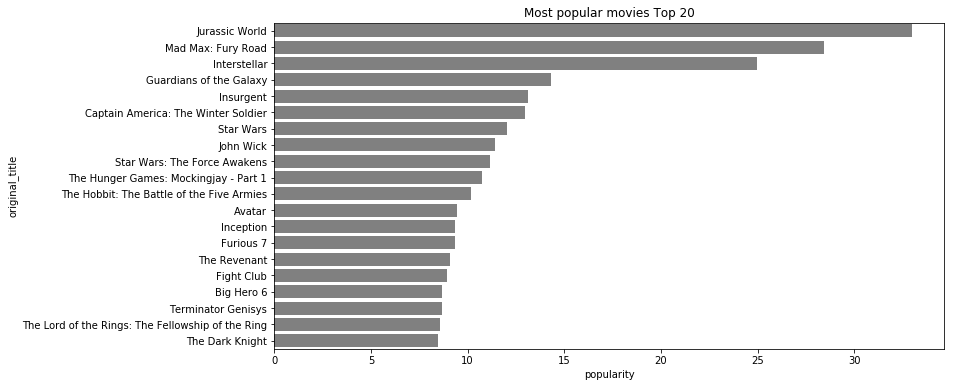

In [17]:
movie_popularity = data.sort_values('popularity',ascending=False).head(20)[['original_title','popularity']]
plt.figure(figsize=(12,6))
plt.title("Most popular movies Top 20")
sns.barplot(x="popularity", y="original_title",data=movie_popularity,color='gray')


#### 3.2 分析电影净利润随年份变化情况

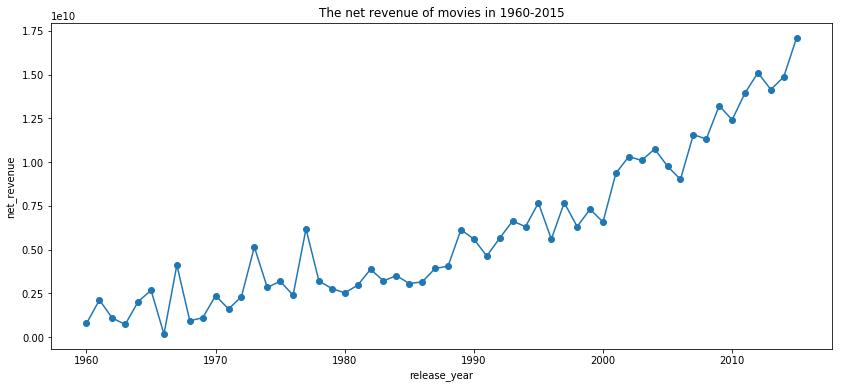

In [18]:
data['net_revenue'] = data.apply(lambda x: x['revenue_adj'] -x['budget_adj'], axis = 1)
net_revenue = data.groupby('release_year')['net_revenue'].sum().reset_index()
# Set the width and height of the figure
plt.figure(figsize = (14,6))
plt.title("The net revenue of movies in 1960-2015")
plt.xlabel('release_year')
plt.ylabel('net_revenue')
plt.plot(net_revenue['release_year'], net_revenue['net_revenue'],marker ='o')

解读：电影利润的总趋势是逐渐增长的。

#### 3.3：选择最多产的10位导演（电影数量最多的），绘制他们排行前3的三部电影的票房情况并简要进行分析

Text(0.5, 0, 'Original Title')

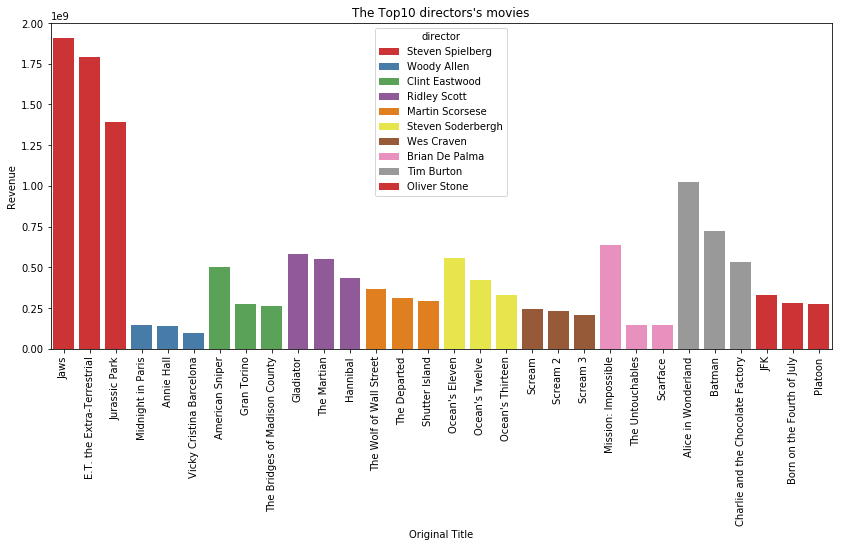

In [27]:
## 去掉空值数据
data = data[data['director']!='No data']
# data['quantity_count']=1
# director_quantity = pd.Series(data.groupby('director')['quantity_count'].sum().sort_values(ascending=False).head(10)).reset_index() 
director_quantity = data.groupby('director').id.count().sort_values(ascending=False).head(10).reset_index()

## 给Top10导演增加一列index，以便之后进行归类
director_quantity['sort_index']=[1,2,3,4,5,6,7,8,9,10]
## 利用merge函数挑选出Top10导演的所有电影，再根据票房和index进行排序
sort_data = data.merge(director_quantity, on='director').sort_values(['sort_index','revenue_adj'],ascending=[True,False])
target_data = sort_data.groupby('director').head(3) 
fig = plt.figure(figsize=(14, 6))
plt.title("The Top10 directors's movies")
## 设置“huge=director”来分类
ax = sns.barplot(data=target_data, x='original_title', y='revenue_adj', hue='director',dodge=False, palette="Set1")
plt.xticks(rotation = 90)
plt.ylabel('Revenue')
plt.xlabel('Original Title')

解读：显然在最多产的十位导演中，票房最卖座的导演是史蒂芬斯皮尔伯格。

#### 3.4：分析1968年~2015年六月电影的数量的变化

Text(0, 0.5, 'Movie Quantity')

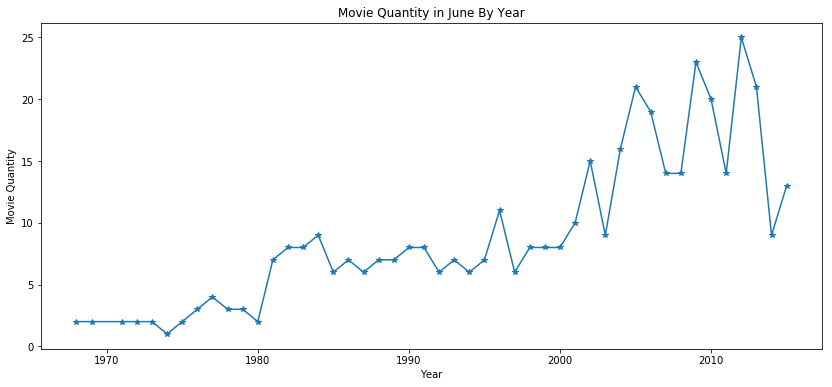

In [20]:
movie_june = data[(data.release_year >= 1968) & (data.release_year <=2015) & (data['release_date'].dt.month == 6)].groupby('release_year').id.count().reset_index()
plt.figure(figsize=(14,6))
plt.plot(movie_june['release_year'] ,movie_june['id'],marker='*')
plt.title('Movie Quantity in June By Year')
plt.xlabel('Year')
# plt.xticks(rotation=90) 
plt.ylabel('Movie Quantity',rotation=90)


#### 3.5 分析1968年~2015年六月电影 Comedy 和 Drama 两类电影的数量的变化 

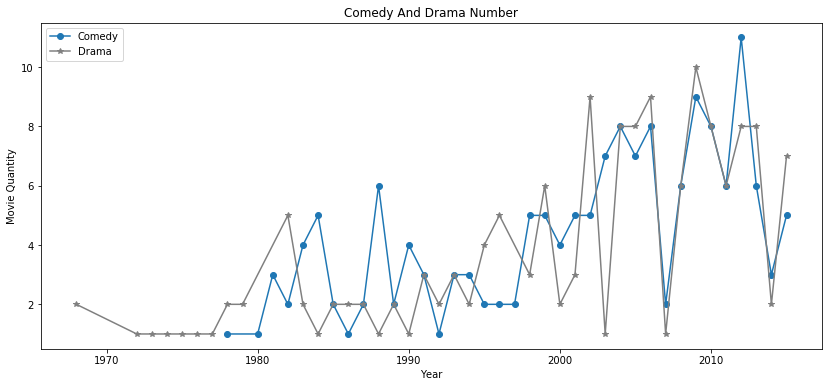

In [26]:
movie_comedy = data[(data['release_year'] >= 1968) & (data['release_year'] <=2015) &(data['genres'].str.contains('Comedy')) & (data['release_date'].dt.month == 6)].groupby('release_year').id.count().reset_index()
movie_drama = data[(data['release_year'] >= 1968) & (data['release_year'] <=2015) &(data['genres'].str.contains('Drama')) & (data['release_date'].dt.month == 6)].groupby('release_year').id.count().reset_index()



plt.figure(figsize=(14,6))
l1, = plt.plot(movie_comedy['release_year'] ,movie_comedy['id'], marker='o');
l2, = plt.plot(movie_drama['release_year'] ,movie_drama['id'], "gray", marker='*');


plt.title('Comedy And Drama Number')
plt.xlabel('Year')
plt.ylabel('Movie Quantity',rotation=90)

plt.legend([l1,l2],['Comedy','Drama'],loc='upper left')


##  独立探索性分析

### 1. 票房Top50电影中的按票房统计电影关键词出现频率

(-0.5, 1499.5, 999.5, -0.5)

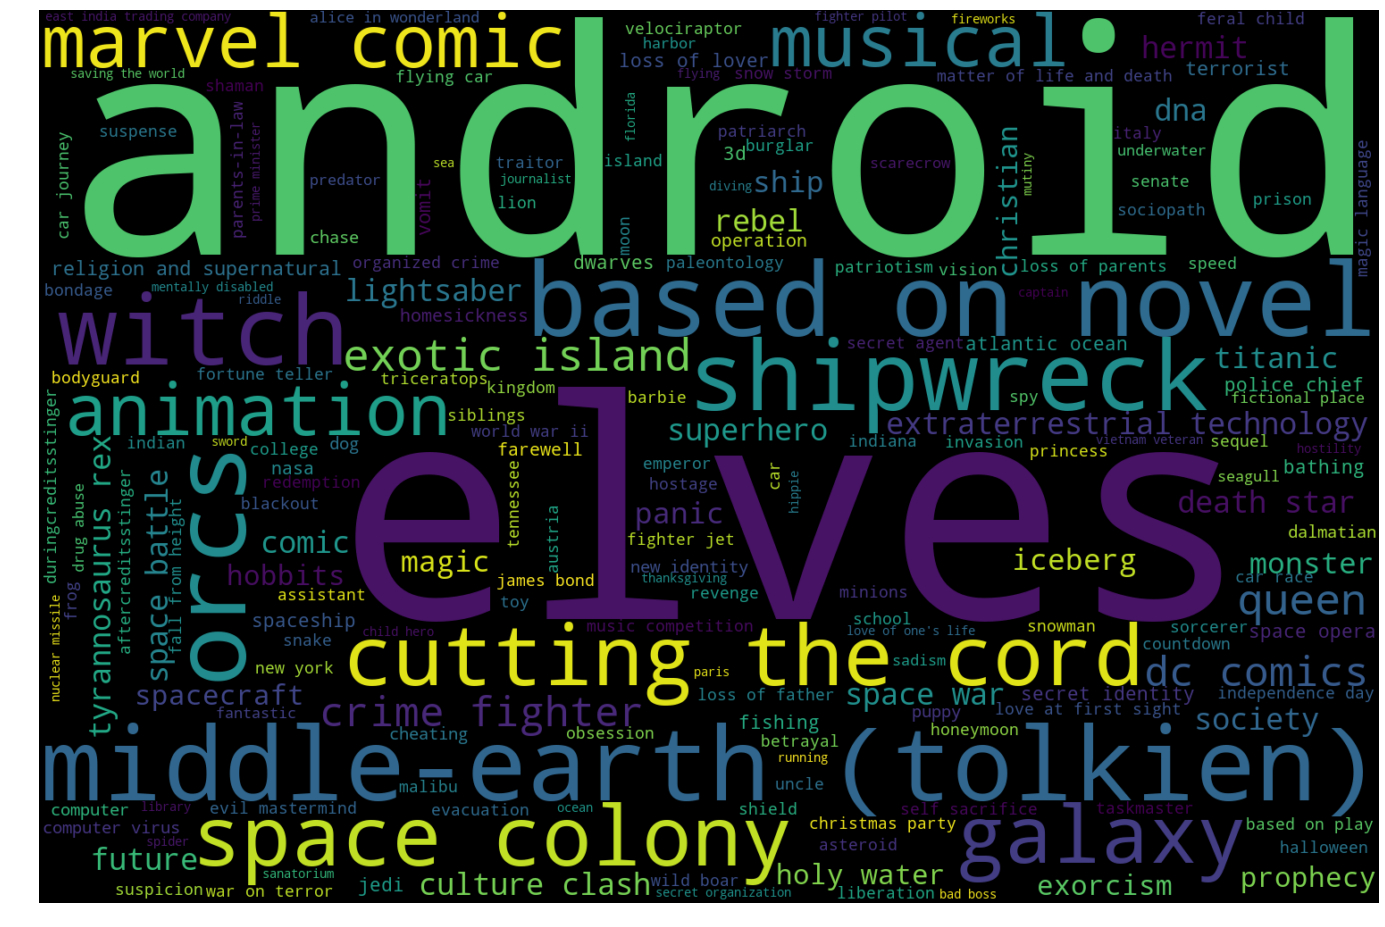

In [22]:
keyws = data['keywords'].str.split('|',expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'keywords'})
movie_keyw = data.sort_values('revenue_adj',ascending=False).head(50)[['original_title','revenue_adj']].join(keyws)
word_dict = movie_keyw.groupby('keywords')['revenue_adj'].sum().to_dict()


wordcloud = WordCloud(width=1500, height =1000)
wordcloud.generate_from_frequencies(word_dict)

plt.figure(figsize=(24,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')

### 2. 1980年以来不同类型电影的数量变化

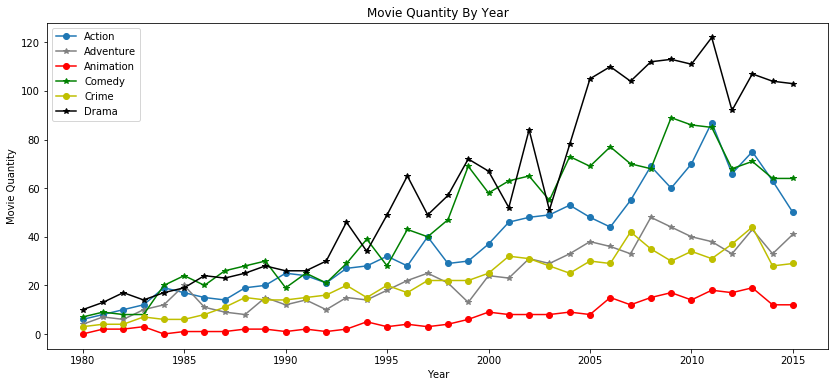

In [23]:
genre = data['genres'].str.split('|',expand=True).stack().reset_index(level=0).set_index('level_0').rename(columns={0:'genres'})
movie_genre = data[data['release_year']>1979][['original_title','release_year']].join(genre)
genre_quantity = movie_genre.groupby('release_year')['genres'].value_counts().unstack().fillna(0)

genre_quantity.columns
plt.figure(figsize=(14,6))
plt.title('Movie Quantity By Year')
plt.xlabel('Year')
# plt.xticks(rotation=90) 
plt.ylabel('Movie Quantity',rotation=90)

## 选了六种类型电影做展示
l1, = plt.plot(genre_quantity.index ,genre_quantity['Action'], marker='o');
l2, = plt.plot(genre_quantity.index ,genre_quantity['Adventure'], "gray", marker='*');
l3, = plt.plot(genre_quantity.index ,genre_quantity['Animation'], "r",marker='o');
l4, = plt.plot(genre_quantity.index ,genre_quantity['Comedy'], "g", marker='*');
l5, = plt.plot(genre_quantity.index ,genre_quantity['Crime'], "y", marker='o');
l6, = plt.plot(genre_quantity.index ,genre_quantity['Drama'], "k", marker='*');

plt.legend([l1,l2,l3,l4,l5,l6],['Action', 'Adventure', 'Animation', 'Comedy', 'Crime','Drama'],loc='upper left')